In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ensemble_project as ens

from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd

In [3]:
data = arff.loadarff('C:/Users/Supervisor/Desktop/Kollektif Öğrenme/Proje/colic.arff')
df = pd.DataFrame(data[0])

df.head()

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_extremities=1rmal,temp_extremities=warm,temp_extremities=cool,temp_extremities=cold,peripheral_pulse=1rmal,...,packed_cell_volume,total_protein,abdomi1centesis_appearance=clear,abdomi1centesis_appearance=cloudy,abdomi1centesis_appearance=serosangui1us,abdomcentesis_total_protein,outcome=lived,outcome=died,outcome=euthanized,a61+1
0,1.0,0.0,0.574074,0.233766,0.227273,0.0,0.0,1.0,0.0,0.0,...,0.577465,0.059510,0.0,1.0,0.0,0.284812,0.0,1.0,0.0,b'2'
1,0.0,0.0,0.703704,0.376623,0.136364,0.0,0.0,1.0,0.0,1.0,...,0.647887,0.953326,0.0,1.0,0.0,0.190000,0.0,0.0,1.0,b'2'
2,1.0,0.0,0.537037,0.064935,0.181818,1.0,0.0,0.0,0.0,1.0,...,0.408451,0.039673,0.0,1.0,0.0,0.284812,1.0,0.0,0.0,b'2'
3,0.0,1.0,0.685185,0.870130,0.863636,0.0,0.0,0.0,1.0,1.0,...,0.619718,0.045508,0.0,0.0,1.0,0.520000,0.0,1.0,0.0,b'1'
4,1.0,0.0,0.351852,0.480519,0.306818,0.0,0.0,1.0,0.0,1.0,...,0.985915,0.047841,0.0,1.0,0.0,0.284812,0.0,1.0,0.0,b'2'


In [4]:
X = df.drop(['a61+1'],axis=1)
y = df['a61+1']

In [5]:
y.groupby(y).count()

a61+1
b'1'    232
b'2'    136
Name: a61+1, dtype: int64

In [6]:
y = y.apply(lambda x : 1 if x==b'1' else 2)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
bagging_100vs10x10, eoe_bagging_100vs10x10, result_bagging_100vs10x10, ttest_bagging_vs_ens = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x10)
print(ttest_bagging_vs_ens)

   bagging_acc   ens_acc
0     0.864865  0.851351
          t         p
0  1.792843  0.132977


In [9]:
ada_100vs10x10, eoe_ada_100vs10x10, result_ada_100vs10x10, ttest_ada_vs_ens = ens.adaBoostClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x10)
print(ttest_ada_vs_ens)

    ada_acc   ens_acc
0  0.810811  0.824324
          t        p
0  2.860388  0.03539


In [10]:
rs_100vs10x10, eoe_rs_100vs10x10, result_rs_100vs10x10, ttest_rs_vs_ens = ens.randomSubspaceClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x10)
print(ttest_rs_vs_ens)

   rnd_subspace_acc   ens_acc
0          0.756757  0.851351
          t         p
0  2.020726  0.099278


In [11]:
rf_100vs10x10, eoe_rf_100vs10x10, result_rf_100vs10x10, ttest_rf_vs_ens = ens.randomForestClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x10)
print(ttest_rf_vs_ens)

     rf_acc   ens_acc
0  0.878378  0.837838
          t         p
0 -3.042903  0.028656


In [12]:
extra_100vs10x10, eoe_extra_100vs10x10, result_extra_100vs10x10, ttest_extra_vs_ens = ens.extraTreesClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x10)
print(ttest_extra_vs_ens)

   extra_acc   ens_acc
0   0.851351  0.824324
     t    p
0  0.0  1.0


In [13]:
bagging_100vs10x100, eoe_bagging_100vs10x100, result_bagging_100vs10x100, ttest_bagging_vs_ens_100 = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x100)
print(ttest_bagging_vs_ens_100)

   bagging_acc   ens_acc
0     0.891892  0.878378
          t         p
0 -1.118034  0.314373


In [14]:
ada_100vs10x100, eoe_ada_100vs10x100, result_ada_100vs10x100, ttest_ada_vs_ens_100 = ens.adaBoostClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x100)
print(ttest_ada_vs_ens_100)

    ada_acc   ens_acc
0  0.810811  0.810811
    t   p
0 NaN NaN


In [15]:
rs_100vs10x100, eoe_rs_100vs10x100, result_rs_100vs10x100, ttest_rs_vs_ens_100 = ens.randomSubspaceClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x100)
print(ttest_rs_vs_ens_100)

   rnd_subspace_acc   ens_acc
0          0.756757  0.864865
          t         p
0  2.288144  0.070813


In [16]:
rf_100vs10x100, eoe_rf_100vs10x100, result_rf_100vs10x100, ttest_rf_vs_ens_100 = ens.randomForestClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x100)
print(ttest_rf_vs_ens_100)

     rf_acc   ens_acc
0  0.864865  0.864865
          t         p
0  0.339032  0.748361


In [17]:
extra_100vs10x100, eoe_extra_100vs10x100, result_extra_100vs10x100, ttest_extra_vs_ens_100 = ens.extraTreesClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x100)
print(ttest_extra_vs_ens_100)

   extra_acc   ens_acc
0   0.851351  0.824324
          t         p
0 -1.446728  0.207617


In [18]:
all_df = ens.single_vote_stack(X_train, X_test, y_train, y_test)

In [19]:
all_df

,0,1
0,Bagging,0.855405
1,Adaboost,0.824324
2,RS,0.843243
3,RF,0.836486
4,ExtraRandomTree,0.820270
5,Voting,0.855405
6,Stack_Bagging,0.824324
7,Stack_Adaboost,0.812162
8,Stack_RS,0.814865
9,Stack_RF,0.851351


In [20]:
import matplotlib.pyplot as plt

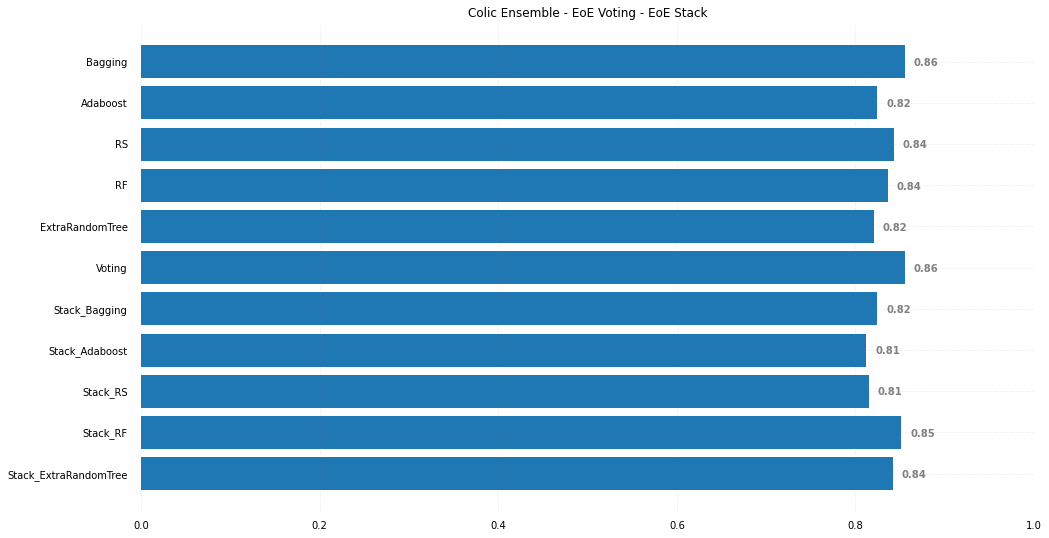

In [21]:
name = all_df[0]
acc = all_df[1]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.set_xlim(0,1)

# Horizontal Bar Plot
ax.barh(name, acc)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Colic Ensemble - EoE Voting - EoE Stack', loc ='center')
 

 
# Show Plot
plt.show()